In [328]:
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
#!wget https://github.com/ocefpaf/python4oceanographers/raw/master/content/downloads/notebooks/data/challenger_path.csv

In [288]:
lon, lat = np.loadtxt('./challenger_path.csv', delimiter=',', unpack=True)

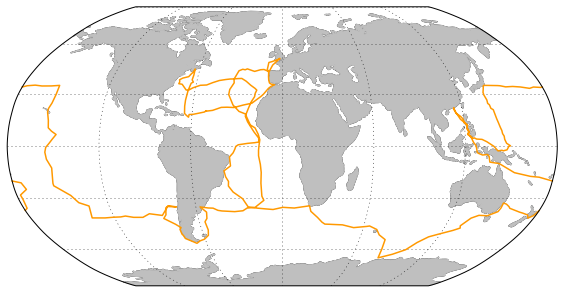

In [297]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution='110m', color='k')
gl = ax.gridlines(draw_labels=False)# Only PlateCarree and Mercator plots are currently supported.
ax.add_feature(cfeature.LAND, facecolor='0.75')
ax.plot(lon, lat, transform=ccrs.Geodetic(), color='#FF9900', linestyle='-', linewidth=1.5);

In [ ]:
#!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc

In [298]:
from netCDF4 import Dataset
fl = Dataset('air.mon.mean.nc')
air = fl.variables['air'][0,:,:]
lat = fl.variables['lat'][:]
lon = fl.variables['lon'][:]

In [299]:
from cartopy.util import add_cyclic_point

In [300]:
air_cyc, lon_cyc = add_cyclic_point(air, coord=lon)

<matplotlib.contour.QuadContourSet instance at 0x1293aa3f8>

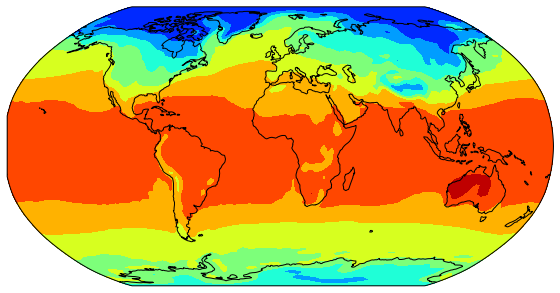

In [301]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
ax.contourf(lon_cyc,lat,air_cyc, transform=ccrs.PlateCarree())

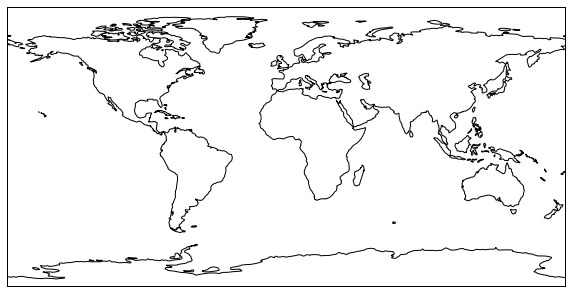

In [302]:
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

In [303]:
lat = 53.565278
lon = 10.001389

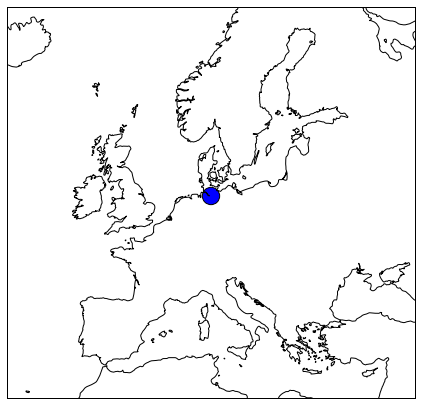

In [305]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m')
ax.scatter(lon,lat,300,transform=ccrs.PlateCarree())

In [306]:
import cartopy.feature as cfeature

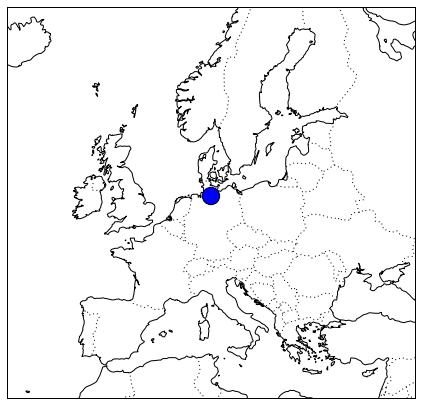

In [309]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.scatter(lon,lat,300,transform=ccrs.PlateCarree(),zorder=10)

In [310]:
import cartopy.io.img_tiles as cimgt
from cartopy.io.img_tiles import GoogleTiles, OSM,QuadtreeTiles,MapQuestOpenAerial,MapQuestOSM

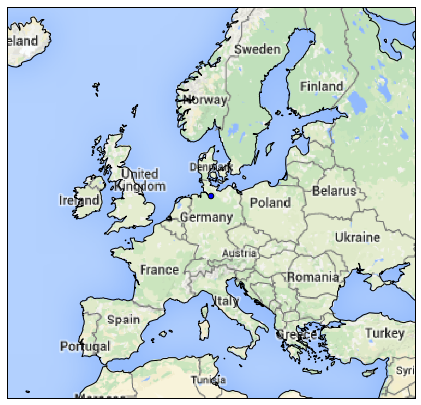

In [315]:

plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.coastlines(resolution='50m',zorder=9)
ax.scatter(lon,lat,30,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = GoogleTiles()
ax.add_image(gg_tiles, 3)


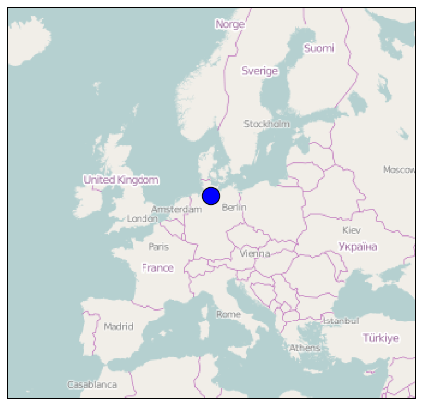

In [317]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.scatter(lon,lat,300,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles, 3)

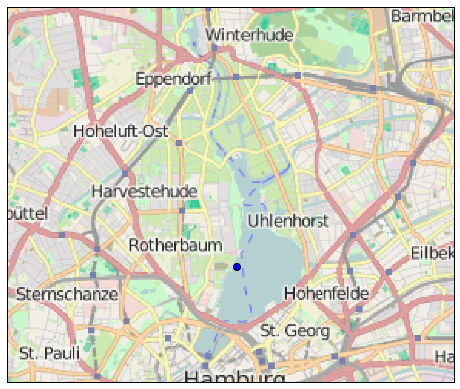

In [318]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([9.95,10.05,53.55,53.6])
ax.scatter(lon,lat,50,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles, 12)

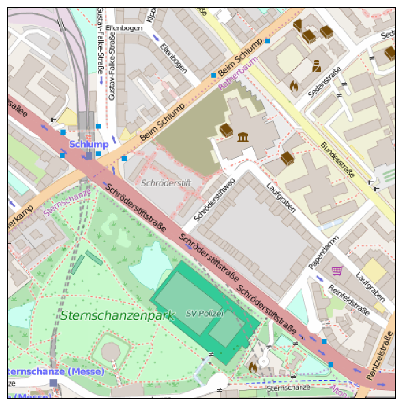

In [319]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([9.968,9.978,53.564,53.57])
ax.scatter(lon,lat,50,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = OSM()
ax.add_image(gg_tiles, 16)

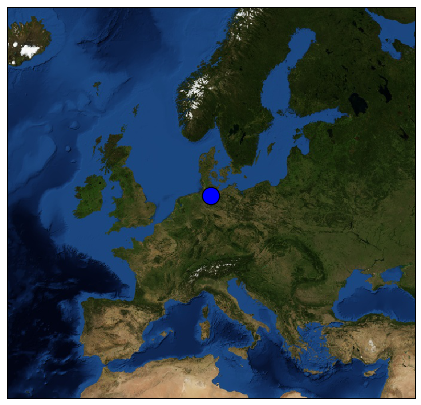

In [321]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-20.,40.,32.,64.])
ax.scatter(lon,lat,300,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = MapQuestOpenAerial()
ax.add_image(gg_tiles, 4)

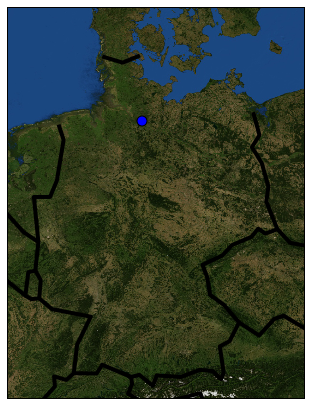

In [322]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([5.,16.,47.,56.])
ax.scatter(lon,lat,100,transform=ccrs.PlateCarree(),zorder=10)
gg_tiles = MapQuestOpenAerial()

ax.add_image(gg_tiles, 7)
ax.add_feature(cfeature.BORDERS, linestyle='-',lw=4)

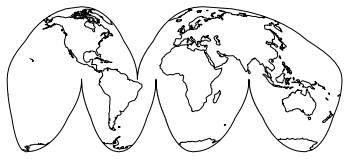

In [333]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

ax.add_wms(wms='http://nowcoast.noaa.gov/wms/com.esri.wms.Esrimap/analyses',layers=['NCEP_RAS_ANAL_RTG_SST'])

In [339]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree(), extent=[-42, 0, -32, 0.5]):
    subplot_kw = dict(projection=projection)
    fig, ax = plt.subplots(subplot_kw=subplot_kw)
    ax.set_extent(extent)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

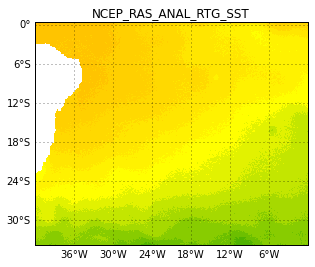

In [340]:
from owslib.wms import WebMapService
url = "http://nowcoast.noaa.gov/wms/com.esri.wms.Esrimap/analyses"
wms = WebMapService(url)

layer = 'NCEP_RAS_ANAL_RTG_SST'
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.add_wms(wms, layer)
_ = ax.set_title(layer)

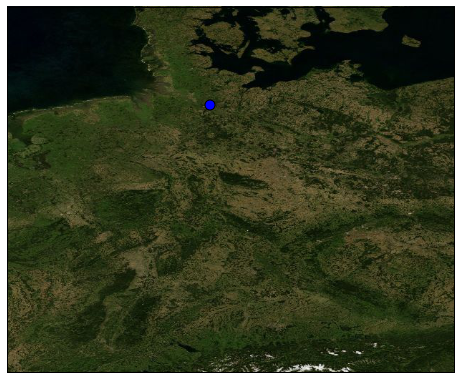

In [345]:
plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([5.,16.,47.,56.])
ax.scatter(lon,lat,100,transform=ccrs.PlateCarree(),zorder=10)

ax.add_wmts('http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi', 'BlueMarble_NextGeneration')
#ax.add_feature(cfeature.LAND)